Data Description: It is a classification data that includes measurements of levels of 59 different metabolites in herbicide-resistant (Res) and susceptible (Sus) plants of a weed species. 
We have 15 and 10 replicates for the Res and Sus group respectively.
* Objective: Objective of this data analysis is to identify any "biomarker" metabolites that can differentiate between the two groups.

Since number of predictors (metabolites) is greater than the number of replicates, the regularization/dimension reduction methods should be better to avoid overfitting.

Further, the number of predictors is high. So, I will not be using ridge regression which does not penalize it to zero.

My goal is to identify "biomarker" metabolites i.e. feature selection. So, I will be using PCA based ML model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv("gly.csv", index_col = "Sample")
Data.head()

,Shikimic acid,1-methylgalactose,PENTATRIMETHYLSILYLGLUCOPYRANOSE,"1,3-Dihydroxyacetone",2-Hydroxypyridine,2-ketoglucose dimethylacetal,2-Oxoglutaric acid,4-hydroxybutyric acid,"5,6-Dihydrouracil",aspartate,...,Oxalic acid,Palmitic acid,pentitol,Pyrophosphoric acid,Pyruvic acid,Stearic acid,Succinic acid,Sucrose,Tagatose,Tyramine
Sample,,,,,,,,,,,,,,,,,,,,,
Res,348333.8,11794.720,29545.200,1782.414,104525.5,15041.97,192241.8,28483.89,1497966,25843.77,...,230976.1,14296.79,71676.06,93981.97,40698.21,16872.24,204690.0,4182937,7509.027,6756.080
Res,839521.3,16751.910,20170.790,1645.274,103178.1,19199.50,125425.9,33245.30,1583592,19996.25,...,271724.6,25176.30,86794.82,117029.40,40592.22,39493.82,213886.4,6371407,15368.330,6474.958
Res,783338.0,9443.292,10461.160,2247.457,123498.6,16306.15,124174.0,31407.77,1193880,15493.45,...,204023.4,16841.14,86312.98,84726.23,47636.07,20974.44,165236.1,6431100,9606.962,7246.028
Res,212615.3,9376.296,10921.660,1189.678,127838.1,19324.28,153706.4,34118.45,1121676,19926.22,...,193792.4,13296.25,78280.13,72390.73,56355.52,15442.18,183261.1,6343477,9296.182,6601.328
Res,227535.5,5863.288,7424.645,1431.302,117302.8,19388.66,127780.8,33561.02,1448438,20026.67,...,208478.1,17481.11,86298.52,109600.30,39458.75,24342.23,161173.4,7536678,6677.706,8965.668


In [3]:
Data.describe()

,Shikimic acid,1-methylgalactose,PENTATRIMETHYLSILYLGLUCOPYRANOSE,"1,3-Dihydroxyacetone",2-Hydroxypyridine,2-ketoglucose dimethylacetal,2-Oxoglutaric acid,4-hydroxybutyric acid,"5,6-Dihydrouracil",aspartate,...,Oxalic acid,Palmitic acid,pentitol,Pyrophosphoric acid,Pyruvic acid,Stearic acid,Succinic acid,Sucrose,Tagatose,Tyramine
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,2.500000e+01,25.00000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01,25.000000,25.00000
mean,363788.488000,9689.426440,17198.024520,1738.513600,89795.455200,16725.448200,167649.01600,28434.961200,1.399223e+06,24592.63760,...,186005.250800,15799.963600,71102.579600,89478.008800,45432.388800,20173.221200,169965.588800,5.275034e+06,7274.007440,5773.94288
std,183081.653606,6037.972143,8391.959701,328.529072,23288.670796,5532.416959,49895.04918,6767.920422,1.560727e+05,7726.96694,...,55964.865681,4375.553539,12195.370223,32262.969053,15313.535635,7783.910849,43952.797511,1.583729e+06,3052.930555,1540.90994
min,171993.500000,3343.306000,7424.645000,1189.678000,41077.890000,6899.532000,103870.30000,17399.100000,1.121676e+06,15049.98000,...,99541.770000,11088.940000,38875.440000,32652.150000,23461.440000,11885.410000,82507.000000,2.509338e+06,2333.554000,3495.80900
25%,227535.500000,5137.597000,12028.140000,1529.070000,84822.050000,14070.670000,129046.80000,24845.180000,1.293006e+06,19926.22000,...,151284.800000,12589.550000,65659.880000,69376.060000,36485.970000,14603.180000,148562.700000,3.758742e+06,5103.311000,4627.83000
50%,309716.800000,7682.112000,15198.590000,1782.414000,93782.090000,16306.150000,143966.00000,28483.890000,1.419251e+06,24757.63000,...,181860.500000,14058.840000,72506.080000,87447.860000,40592.220000,16872.240000,183973.500000,5.983071e+06,6734.046000,5712.82700
75%,439768.100000,13119.310000,19524.370000,1897.273000,103762.600000,19388.660000,202832.30000,33245.300000,1.539930e+06,27620.81000,...,204023.400000,17622.710000,78280.130000,96367.420000,51564.110000,23107.260000,197498.500000,6.431100e+06,8501.764000,6756.08000
max,839521.300000,24639.090000,45969.040000,2381.595000,127838.100000,31347.810000,263571.60000,49786.740000,1.608459e+06,53224.82000,...,370121.400000,25176.300000,91354.410000,162464.800000,84851.630000,39493.820000,241881.200000,7.536678e+06,15368.330000,8965.66800


Data has no missing and NaN values. So, there is no need for imputation.

Text(0.5, 1.0, '1-methylgalactose')

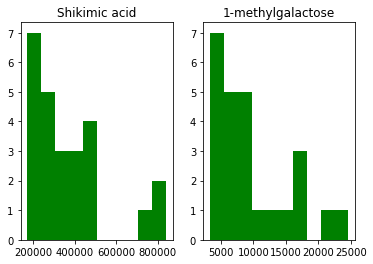

In [5]:
#Let's have a look at the data distribution

plt.subplot(1,2,1).hist(Data["Shikimic acid"], color = "green")
plt.title("Shikimic acid")
plt.subplot(1,2,2).hist(Data["1-methylgalactose"], color = "green")
plt.title("1-methylgalactose")

#Most of these don't have normal distribution of data. Since the data reduction methods are not based on assumption of normality, that should be alright

In [15]:
#Creating the target(predictant) categorical dataframe 
array = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0])
target_names = np.array(["Herbicide-Susceptible", "Herbicide-Resistant"])
y = pd.DataFrame(array)
y['Biotype']=pd.Categorical.from_codes(array, target_names)

In [21]:
y

,0,Biotype
0,1,Herbicide-Resistant
1,1,Herbicide-Resistant
2,1,Herbicide-Resistant
3,1,Herbicide-Resistant
4,1,Herbicide-Resistant
5,1,Herbicide-Resistant
6,1,Herbicide-Resistant
7,1,Herbicide-Resistant
8,1,Herbicide-Resistant
9,1,Herbicide-Resistant


In [26]:
#Dividing the data to training and testing sets and scaling the data as well.

#Scaling is important since the dimension reduction methods follow the assumption of unit variance.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(Data,y,train_size=0.6,random_state=123)

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [27]:
X_train_scaled

array([[-1.00314459, -0.63415245, -0.95901997,  1.05502684,  1.06273954,
         0.67973692, -0.89888933,  0.70547922,  1.04865821, -0.26377732,
         0.63221289, -0.17173623, -0.94866131, -0.71755509, -0.48134325,
        -0.46540956, -0.18312021, -0.68077016, -0.37474048,  0.8219236 ,
         0.4810019 , -0.40542356, -1.89361102,  0.44672518, -0.53262095,
        -0.70952367, -0.13866402,  0.84985253,  0.04338359,  1.07891651,
        -1.08046356,  0.30501793,  1.2245675 , -0.78614432, -1.34391068,
        -1.06331638, -0.25811342, -0.12224011, -0.20917674, -0.87529357,
        -1.34918999, -1.14569454, -0.84379771, -0.84499278, -0.77082722,
        -0.26624699, -0.94741902, -0.52835083, -1.37807025,  0.48389902,
         0.54188858, -0.1424257 , -0.36902277, -0.50032199,  0.47319442,
         0.29459018, -1.3270538 , -0.28025438, -0.17820172],
       [-0.63095694, -0.32496404, -0.73367632, -1.78435672, -0.1013312 ,
        -0.56704801, -0.58593307, -0.14196715, -0.90975125,  0.

In [28]:
X_test_scaled

array([[-1.05005704, -0.44006131, -0.79434761, -1.55586135,  0.53089682,
        -0.20196513, -0.62414429,  0.24038177,  0.32859275, -0.79426381,
         0.76914956,  1.15022048, -1.2589893 , -1.37613976, -0.47814396,
        -1.08329353,  0.99791429,  0.87709409,  1.07270462,  0.52460054,
         1.1430041 , -0.70296894,  0.55335746, -1.12528115, -0.39742027,
        -0.08581577, -0.78041342,  0.76721697, -0.43086562,  0.76204326,
        -1.14765849,  0.20251681, -0.12557632,  0.39532367, -0.59249257,
         0.23837465,  1.28926114,  1.07980452, -0.32722679,  0.68364388,
        -0.22102388, -0.35730836,  0.12789166,  0.48960955, -0.49168912,
        -0.31380725, -0.12360075, -0.49418478,  0.64331128,  0.13887771,
        -0.80095563,  0.33927745, -0.42866913,  0.15518127, -0.80600206,
        -0.52729007,  0.25743943,  0.64219949,  0.32424985],
       [-0.7802498 , -1.03683643, -0.07736037,  0.34229155,  0.47894644,
         1.84384905, -0.75536592,  1.07552452,  1.02470509,  0.

In [34]:
#Doing the PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
PCs = pca.fit_transform(X_train_scaled)
PCs = pd.DataFrame(PCs,columns = ['PC1','PC2','PC3','PC4'])
PCs

,PC1,PC2,PC3,PC4
0,-1.941928,0.340075,2.146030,4.117298
1,-2.999063,-2.109330,2.610659,-1.413816
2,-4.513094,4.407577,-1.653015,-1.488438
3,0.981890,-1.573648,-4.548275,2.902288
4,-0.774714,-3.423182,1.397362,0.944848
5,4.457097,4.947772,5.080204,2.551540
6,2.315320,-2.192826,2.089778,-2.304485
7,5.082932,5.998216,-1.165561,-1.176598
8,-0.303331,-5.057308,-5.046040,2.505923
9,-8.054302,1.762577,-0.371902,-2.303673


In [32]:
pca.explained_variance_ratio_

array([0.32094428, 0.20311841, 0.14290025, 0.09487511])

The first three components explains around two-third (66%) of variation in the data set. It's not a lot but using too many components might increase the complexity of model. So, Let's use first three components

In [36]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pd.DataFrame(pca.transform(X_test_scaled))
X_test_pca.columns=['PC1','PC2','PC3']

In [37]:
X_test_pca

,PC1,PC2,PC3
0,-0.746752,-1.465722,-0.219022
1,-0.906927,2.130531,3.048296
2,-1.592954,0.448738,3.186009
3,-5.812341,1.759868,-0.628540
4,1.273191,6.291952,0.251967
5,-0.940676,-2.159185,-2.275387
6,0.084626,-1.818689,-4.192207
7,5.758321,-3.432922,1.509605
8,2.639928,-0.628091,0.208128
9,0.243583,-1.126480,-0.888849


In [38]:
pca.explained_variance_ratio_

array([0.32094428, 0.20311841, 0.14290025])

Now using the PCA, I will be using Random Forest as Machine Learning Model. This is because:
* the data is high-dimensional (n <<< p), for which random forest works good.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc_score
model_RF = RandomForestClassifier(n_estimators=20,criterion="gini",random_state=123).fit(X_train_pca, y_train['Biotype'])
y_pred_RF = model_RF.predict(X_test_pca)
acc_score(y_test['Biotype'],y_pred_RF)

0.8

The accuracy score is 80% that means it can identify correctly identify 80% of the time

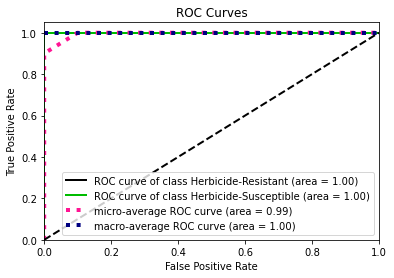

In [60]:
#Plotting the AUC-ROC curve.
import scikitplot as skplt
y_probs = model_RF.predict_proba(X_test_pca)
skplt.metrics.plot_roc(y_pred_RF, y_probs)
plt.show()

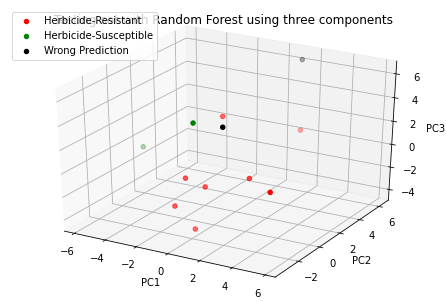

In [195]:
#Plotting the plot.
ax1 = plt.axes(projection='3d')
plt.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
targets = np.unique(y_pred_RF)
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indp = y_pred_RF == target
    ax1.scatter(X_test_pca.loc[indp, 'PC1'], X_test_pca.loc[indp, 'PC2'],X_test_pca.loc[indp, 'PC3'], c = color)
# Ploting the Wrong Prediction
ind = y_pred_RF!=np.array(y_test['Biotype'])
ax1.scatter(X_test_pca.loc[ind, 'PC1'],X_test_pca.loc[ind, 'PC2'], X_test_pca.loc[ind, 'PC2'],c = 'black')

ax1.legend(['Herbicide-Resistant','Herbicide-Susceptible','Wrong Prediction'], loc = "upper left")
ax1.set_title("Testing set with Random Forest using three components")
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

plt.show()

Using three components, only two of the samples are predicted incorrectly.

Hence, based on accuracy scores and the plot, the model looks good

In [177]:
#Looking at the important features (metabolites) driving the classification
vip = pd.DataFrame(pca.components_)
vip.columns = Data.columns
VIP = vip.transpose()
VIP = VIP.rename(columns = {0:"PC1",1:"PC2",2:"PC3"})
VIP.head()

,PC1,PC2,PC3
Shikimic acid,0.138047,0.120113,-0.163633
1-methylgalactose,0.172236,-0.030963,-0.172255
PENTATRIMETHYLSILYLGLUCOPYRANOSE,0.095568,0.087362,0.076043
"1,3-Dihydroxyacetone",0.134738,0.046317,-0.087587
2-Hydroxypyridine,0.170344,-0.018662,0.092230


In [194]:
#Looking at the top metabolites for PC1
VIP["PC1"].sort_values(ascending = False)

Tyrosine                            0.202214
Pyrophosphoric acid                 0.194635
Phenylalanine                       0.192502
pentitol                            0.192188
Tagatose                            0.191310
Tyramine                            0.189276
Succinic acid                       0.184175
Threonine                           0.175364
1-methylgalactose                   0.172236
Glycolic acid                       0.170573
GABA                                0.170419
2-Hydroxypyridine                   0.170344
dehydroascorbic acid                0.168539
Isoleucine                          0.166293
L-5-Oxoproline                      0.164472
Caffeic acid                        0.162752
cis-Aconitic acid                   0.162319
Inositol                            0.160856
Glutamine                           0.155336
Palmitic acid                       0.154737
2-ketoglucose dimethylacetal        0.154093
Stearic acid                        0.148069
Glycerol  

In [192]:
#Looking at the top metabolites for PC2
VIP["PC2"].sort_values(ascending = False)

glucose-1-phosphate                 0.235908
glycerol-3-galactoside 2            0.235583
n-acetyl-d-hexosamine 2             0.217938
galactinol                          0.214095
Ribose                              0.189052
Stearic acid                        0.188537
Ferulic acid                        0.179198
Palmitic acid                       0.178529
Tryptophan                          0.176336
5,6-Dihydrouracil                   0.153922
Tagatose                            0.135208
Shikimic acid                       0.120113
pentitol                            0.094192
Tyrosine                            0.091547
Sucrose                             0.089312
PENTATRIMETHYLSILYLGLUCOPYRANOSE    0.087362
dehydroascorbic acid                0.060864
1,3-Dihydroxyacetone                0.046317
4-hydroxybutyric acid               0.045053
Glycolic acid                       0.039954
Threonine                           0.038909
cis-Aconitic acid                   0.027759
Nicotinic 

In [193]:
#Looking at the top metabolites for PC3
VIP["PC3"].sort_values(ascending = False)

aspartate                           0.261220
Aspartic acid                       0.257377
isothreonic acid 4                  0.242065
Glycerol                            0.237559
4-hydroxybutyric acid               0.203992
2-ketoglucose dimethylacetal        0.163079
Tyramine                            0.156390
Ribose                              0.147255
Glyceric acid                       0.139573
Benzoic acid                        0.129319
Ethanolamine                        0.120513
Serine                              0.120321
Succinic acid                       0.104710
Oxalic acid                         0.102620
2-Hydroxypyridine                   0.092230
5,6-Dihydrouracil                   0.081153
Pyrophosphoric acid                 0.080104
PENTATRIMETHYLSILYLGLUCOPYRANOSE    0.076043
Citric acid                         0.068958
dehydroascorbic acid                0.066946
pentitol                            0.063012
Valine                              0.059950
cis-Aconit

Based on this analysis, we can extract the most important metabolites driving the differences in Herbicide-Resistant and Herbicide-Susceptible biotypes of weed. These are mainly aromatic amino acids (tyrosine, phenylalanine, tyramine) and sugars(glucose-1-phosphate, glycerol-3-galactoside 2, n-acetyl-d-hexosamine 2,galactinol,Ribose)